# Accumulation and Difference Features

---
Medical Image Analysis Project - Pankaj Kabra

---

#### In accumulation density features
- First image is the normal Accumulation image
- Second image is the time weighted Accumulation image

#### In Cosnecutieve Difference features
- First image is the image at time `t`
- Second image is the the image at time `t+1`
- Third image is their difference



>data folder - https://drive.google.com/open?id=1Ys0k0nxhgB_fbx1hd-Khq7rhi3xh24r1
>
>save the folder `bbx_data` in the same place as the notebook.

In [1]:
import os
from skimage import io, img_as_float
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
%matplotlib inline
from matplotlib.patches import Rectangle
import numpy as np
import utils_ml4mi as utl

In [2]:
def get_img_list(patient):
    bleeding_path = "bbx_data/"
    images = []
    bboxes = []
    for file in os.listdir(bleeding_path):
        if (".jpg" in file) and ("_orig" in file) and (file.startswith(patient)):
            img = io.imread(bleeding_path+file)
            images.append(img)
        if (".txt" in file) and ("_orig" in file) and (file.startswith(patient)):
            with open(bleeding_path+file,"r") as f: bbx = f.read()
            bbx = [int(float(i)*800) for i in bbx.split()[1:]]
            bboxes.append(bbx)
    return images, bboxes

In [3]:
def bbx_viz(image, bbx, figs, img_name):
    """
    expects that the bbox is in xymiwh format, size of image is 800x800
    """
    fig1, ax1 = plt.subplots(figsize = figs)
    # Rectangle takes bottom-left coords (bottom in terms of data coordinates, as the y axis is flipped, its top left visually)
    bottom_left = (bbx[0]-bbx[2]/2.,bbx[1]-bbx[3]/2.)
    ax1.add_patch(Rectangle(xy=bottom_left, width=bbx[2], height=bbx[3],linewidth=1,edgecolor='r',facecolor='none'))
    ax1.imshow(image, cmap = "gray")
    ax1.set_title(img_name,fontsize=18)

In [5]:
imglist, bbxlist = get_img_list("60_")

aggimg = np.zeros((800,800),dtype="uint64")
aggimg_wgh = np.zeros((800,800),dtype="uint64")
for i,j in enumerate(imglist):
    j = np.array(j, dtype="uint64")
    aggimg += j
    aggimg_wgh += (i+1)**5*j

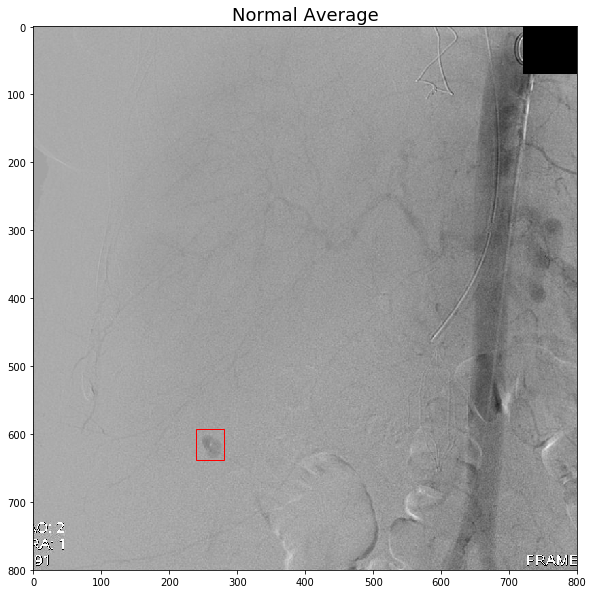

In [6]:
bbx_viz(aggimg, bbxlist[-1], (10,10),"Normal Average")

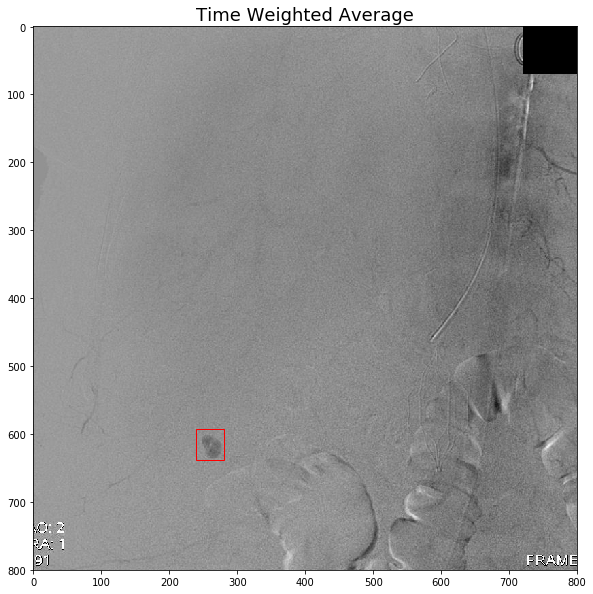

In [86]:
bbx_viz(aggimg_wgh, bbxlist[-1], (10,10),"Time Weighted Average")

In [87]:
imglist, bbxlist = get_img_list("75_")
aggimg = np.zeros((800,800),dtype='uint64')
aggimg_wgh = np.zeros((800,800),dtype='uint64')
aggdiv = 0
aggwdiv = 0
for i,j in enumerate(imglist):
    #print(i,aggimg_wgh[151:152,151:152],j[151:152,151:152])
    j = np.array(j, dtype="uint64")
    aggimg += j
    aggimg_wgh += (i+1)**5*j

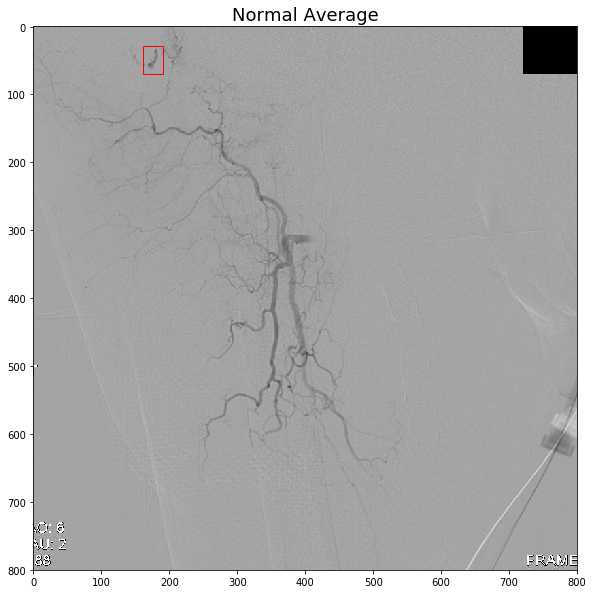

In [88]:
bbx_viz(aggimg, bbxlist[-1], (10,10),"Normal Average")

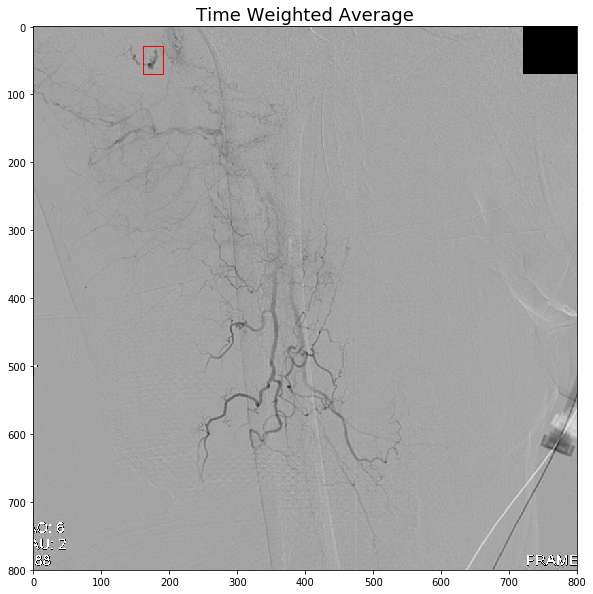

In [89]:
bbx_viz(aggimg_wgh, bbxlist[-1], (10,10),"Time Weighted Average")

In [90]:
imglist, bbxlist = get_img_list("15_")
aggimg = np.zeros((800,800),dtype='uint64')
aggimg_wgh = np.zeros((800,800),dtype='uint64')
aggdiv = 0
aggwdiv = 0
for i,j in enumerate(imglist):
    #print(i,aggimg_wgh[151:152,151:152],j[151:152,151:152])
    j = np.array(j, dtype="uint64")
    aggimg += j
    aggimg_wgh += (i+1)**5*j

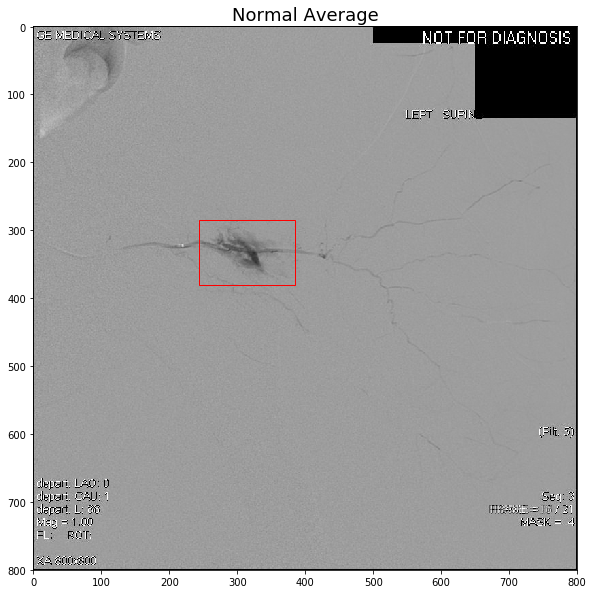

In [91]:
bbx_viz(aggimg, bbxlist[-1], (10,10),"Normal Average")

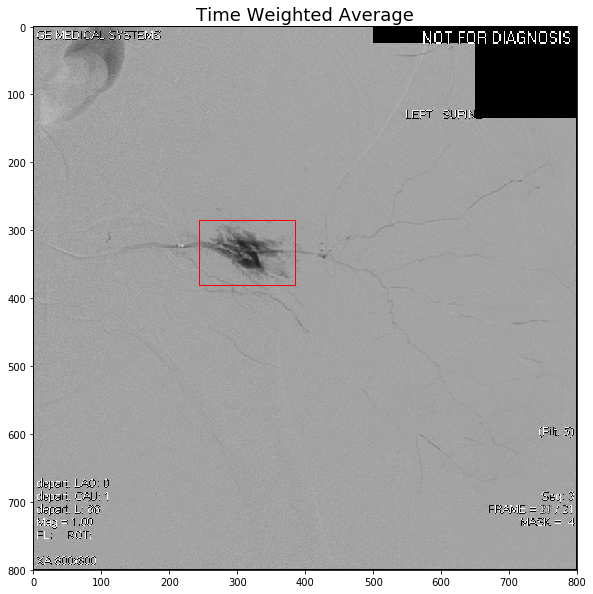

In [92]:
bbx_viz(aggimg_wgh, bbxlist[-1], (10,10),"Time Weighted Average")

# Consecutive Difference Features

In [98]:
imglist, bbxlist = get_img_list("44_")

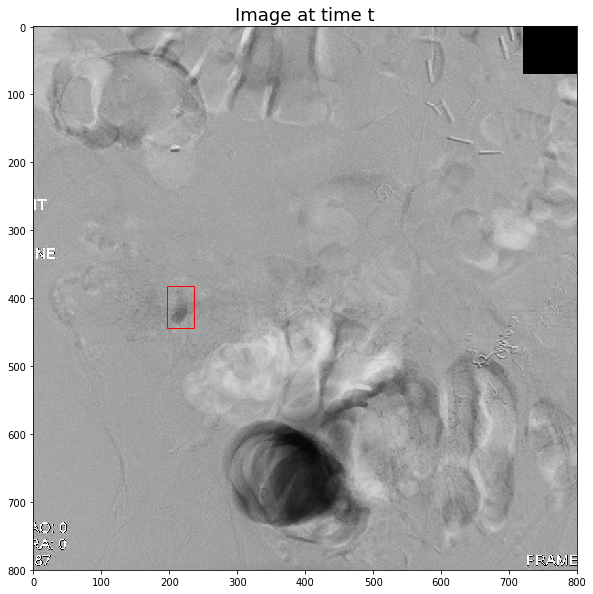

In [99]:
bbx_viz(imglist[-1], bbxlist[-1], (10,10), "Image at time t")

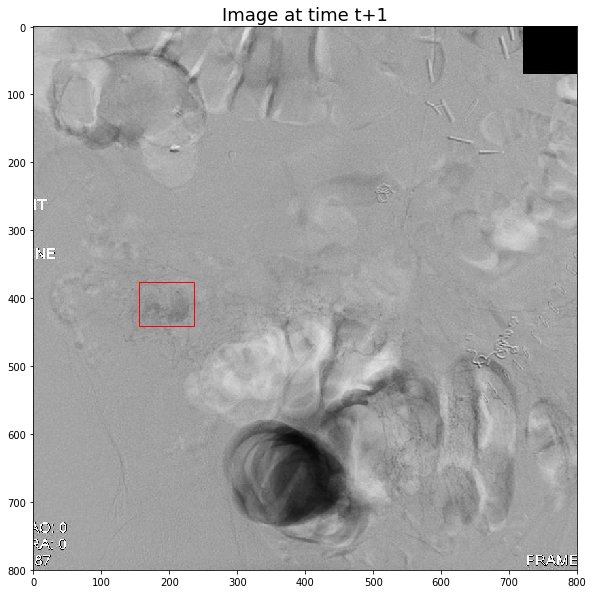

In [100]:
bbx_viz(imglist[-2], bbxlist[-2], (10,10), "Image at time t+1")

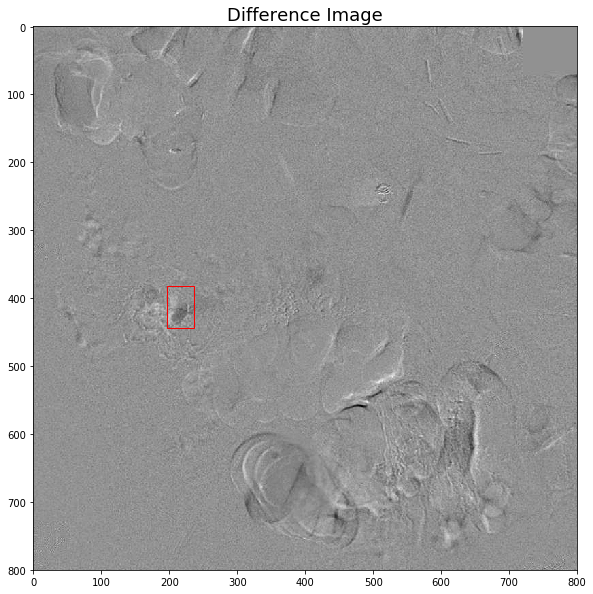

In [101]:
bbx_viz(imglist[-1].astype('int64')-imglist[-2].astype('int64'), bbxlist[-1], (10,10), "Difference Image")

In [102]:
imglist, bbxlist = get_img_list("71_")
len(imglist)

18

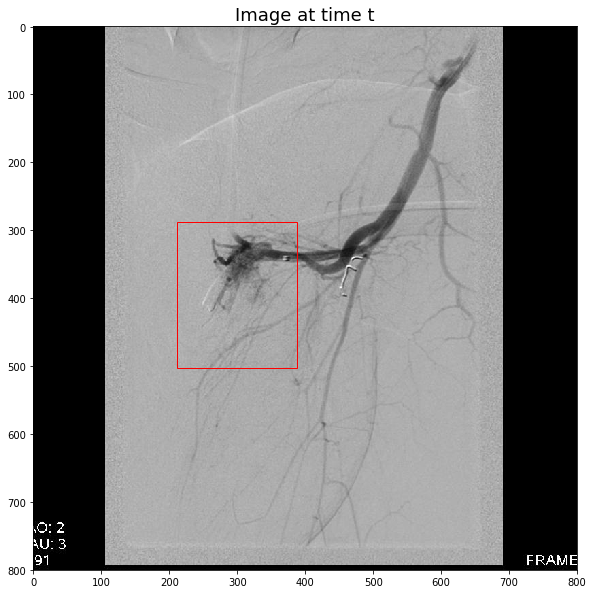

In [103]:
bbx_viz(imglist[-9], bbxlist[-1], (10,10),"Image at time t")

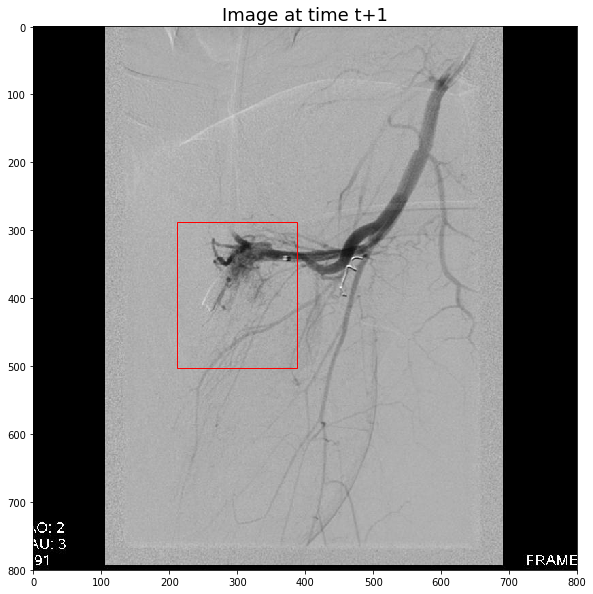

In [104]:
bbx_viz(imglist[-10], bbxlist[-1], (10,10),"Image at time t+1")

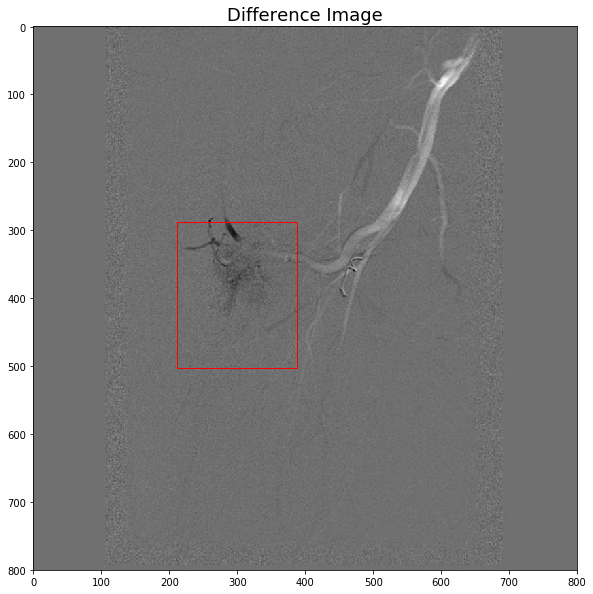

In [105]:
bbx_viz(imglist[-8].astype('int64')-imglist[-9].astype('int64'), bbxlist[-1], (10,10),"Difference Image")

In [106]:
imglist, bbxlist = get_img_list("35_")
len(imglist)

11

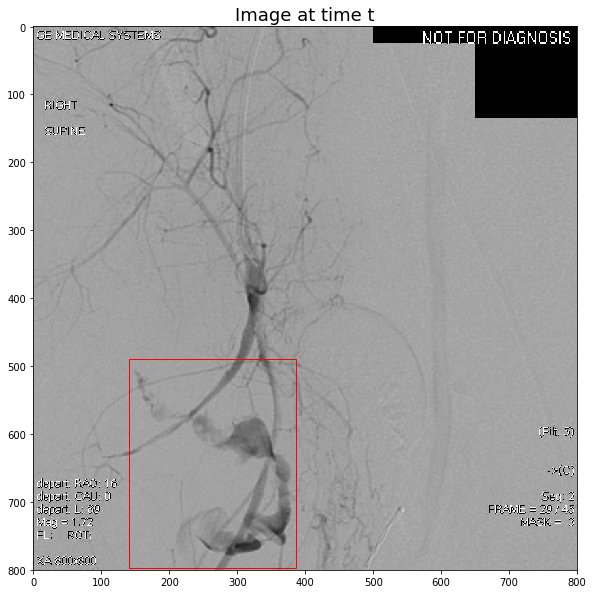

In [107]:
bbx_viz(imglist[-5], bbxlist[-1], (10,10), "Image at time t")

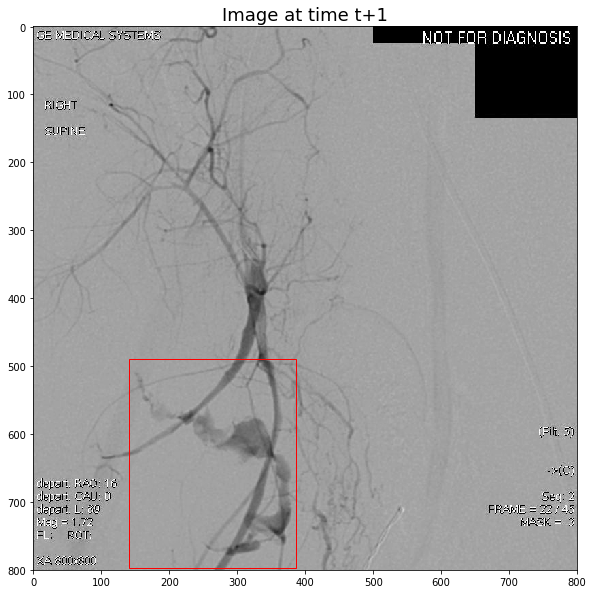

In [108]:
bbx_viz(imglist[-6], bbxlist[-1], (10,10), "Image at time t+1")

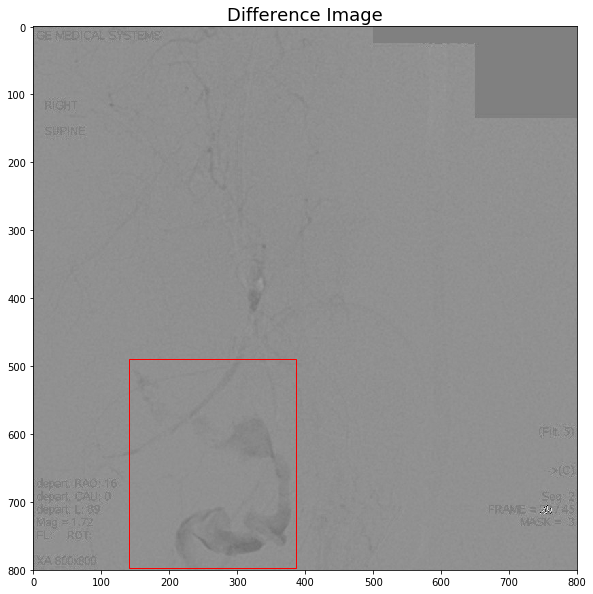

In [109]:
bbx_viz(imglist[-4].astype('int64')-imglist[-5].astype('int64'), bbxlist[-1], (10,10), "Difference Image")